<a href="https://colab.research.google.com/github/shahroz-dev/Classification_of_IRIS_Flower/blob/main/Supervised_Techniques_for_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahrozds","key":"5a27b4ba1d94a1fd6ee9b652be4d335f"}'}

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
#permission for json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#to list all dataset in kaggle
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                        Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23          11532        351  1.0              
zusmani/petrolgas-prices-worldwide                              Petrol/Gas Prices Worldwide                          10KB  2022-06-24 01:25:33            796         62  1.0              
devansodariya/student-performance-data                          Student Performance Dataset                           7KB  2022-05-26 13:55:09           6592        192  0.9705882        
ruchi798/data-science-job-salaries                          

In [ ]:
! kaggle datasets download -d uciml/iris

  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 3.26MB/s]


In [ ]:
! unzip iris.zip

Archive:  iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
data = pd.read_csv('Iris.csv')

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Check for Missing Value

In [ ]:
print('Missing Values')
print(30*'-')
print(data.isna().sum())
print(30*'-')
print('Total Missing values: {}'.format(data.isna().sum().sum()))


Missing Values
------------------------------
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
------------------------------
Total Missing values: 0


## Exploratory Data Analysis

In [ ]:
data.drop('Id', axis=1, inplace=True)

#Distribution of Classes

Text(0.5, 1.0, 'Distribution of the Species')

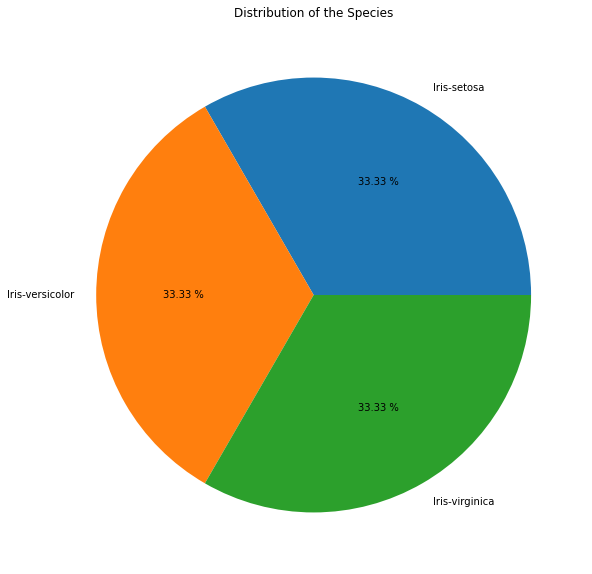

In [ ]:
count_list = [(data['Species']=='Iris-setosa').sum(), (data['Species']=='Iris-versicolor').sum(), (data['Species']=='Iris-virginica').sum()]
label_list = list(data['Species'].unique())
fig = plt.subplots(figsize = (10, 10))
plt.pie(count_list, labels = label_list, autopct = '%.2f %%')
plt.title('Distribution of the Species')

##Univariate Analysis



###Scatter Plot

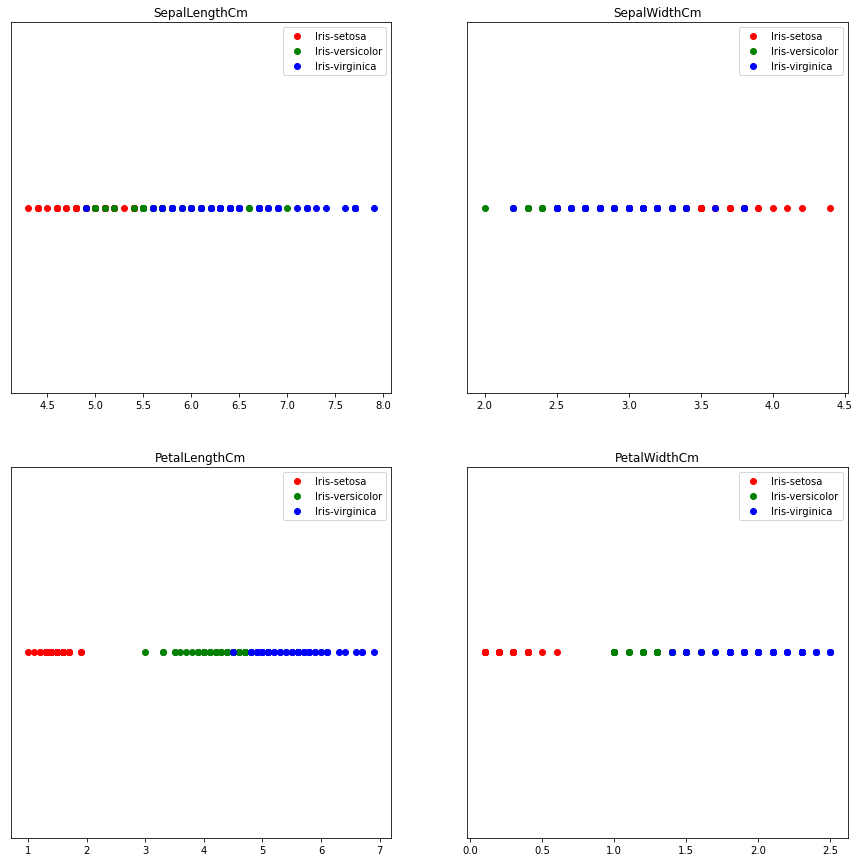

In [ ]:
def create_scatterPlot(ax, feature):
  arr = data.loc[data['Species'] == 'Iris-setosa', feature]
  arrsz = len(arr)
  ax.plot(arr, np.zeros(arrsz), 'ro', label = 'Iris-setosa')
  arr = data.loc[data['Species'] == 'Iris-versicolor', feature]
  arrsz = len(arr)
  ax.plot(arr, np.zeros(arrsz), 'go', label = 'Iris-versicolor')
  arr = data.loc[data['Species'] == 'Iris-virginica', feature]
  arrsz = len(arr)
  ax.plot(arr, np.zeros(arrsz), 'bo', label = 'Iris-virginica')
  ax.set_title(feature)
  ax.legend()
  ax.get_yaxis().set_visible(False)

fig, ax = plt.subplots(2,2, figsize = (15, 15))
create_scatterPlot(ax[0,0], 'SepalLengthCm')
create_scatterPlot(ax[0,1], 'SepalWidthCm')
create_scatterPlot(ax[1,0], 'PetalLengthCm')
create_scatterPlot(ax[1,1], 'PetalWidthCm')
plt.show()

###Box Plot

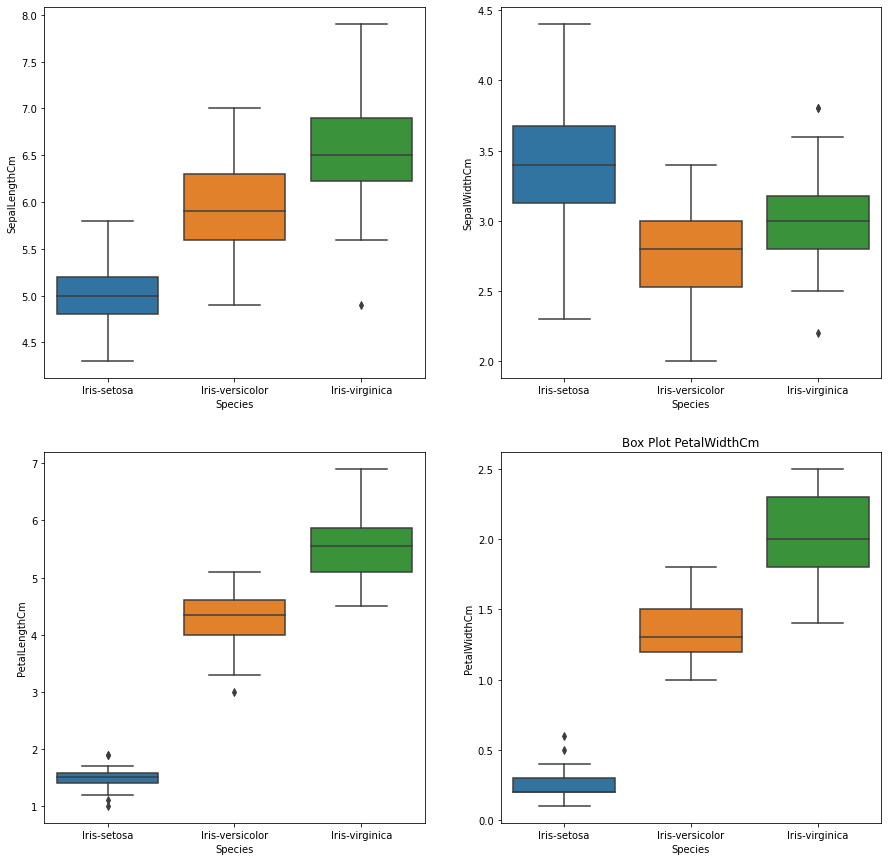

In [ ]:
def create_boxplot(ax, feature):
  sns.boxplot(ax = ax, data = data, x='Species', y=feature)
  plt.title('Box Plot ' + feature)
  plt.xlabel('Species')
  plt.ylabel(feature)

fig, ax = plt.subplots(2,2, figsize = (15, 15))
create_boxplot(ax[0,0], 'SepalLengthCm')  
create_boxplot(ax[0,1], 'SepalWidthCm')
create_boxplot(ax[1,0], 'PetalLengthCm')
create_boxplot(ax[1,1], 'PetalWidthCm')
plt.show()

###Violen Plot

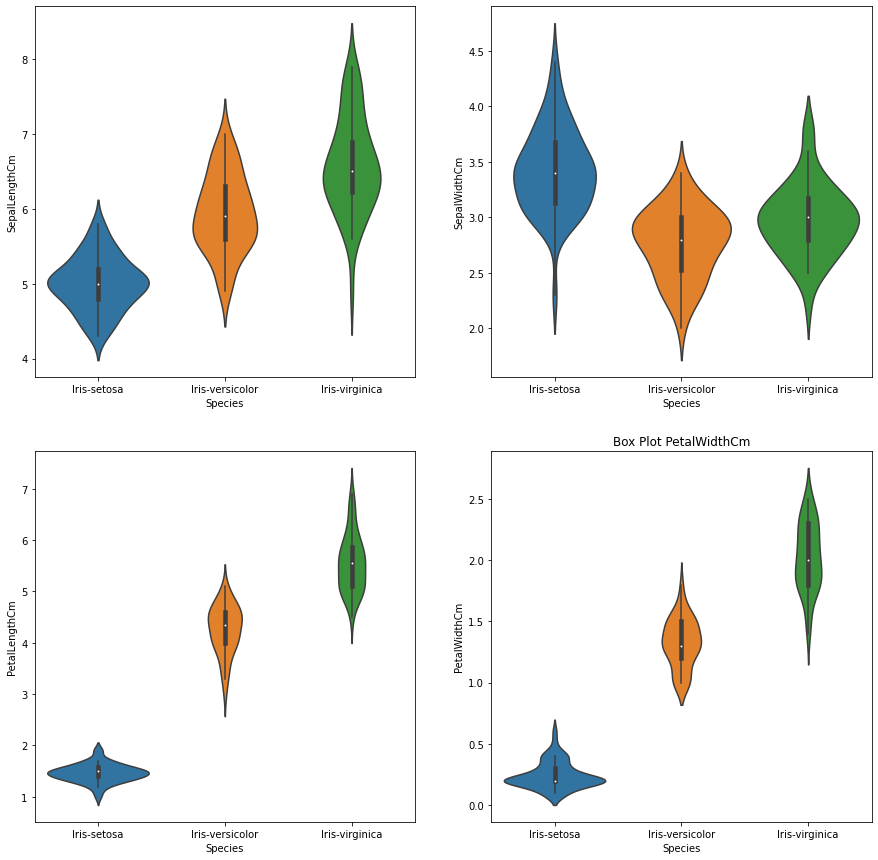

In [ ]:
def create_violinplot(ax, feature):
  sns.violinplot(ax = ax, data = data, x='Species', y=feature)
  plt.title('Box Plot ' + feature)
  plt.xlabel('Species')
  plt.ylabel(feature)

fig, ax = plt.subplots(2,2, figsize = (15, 15))
create_violinplot(ax[0,0], 'SepalLengthCm')  
create_violinplot(ax[0,1], 'SepalWidthCm')
create_violinplot(ax[1,0], 'PetalLengthCm')
create_violinplot(ax[1,1], 'PetalWidthCm')
plt.show()

##Multivariate Analysis

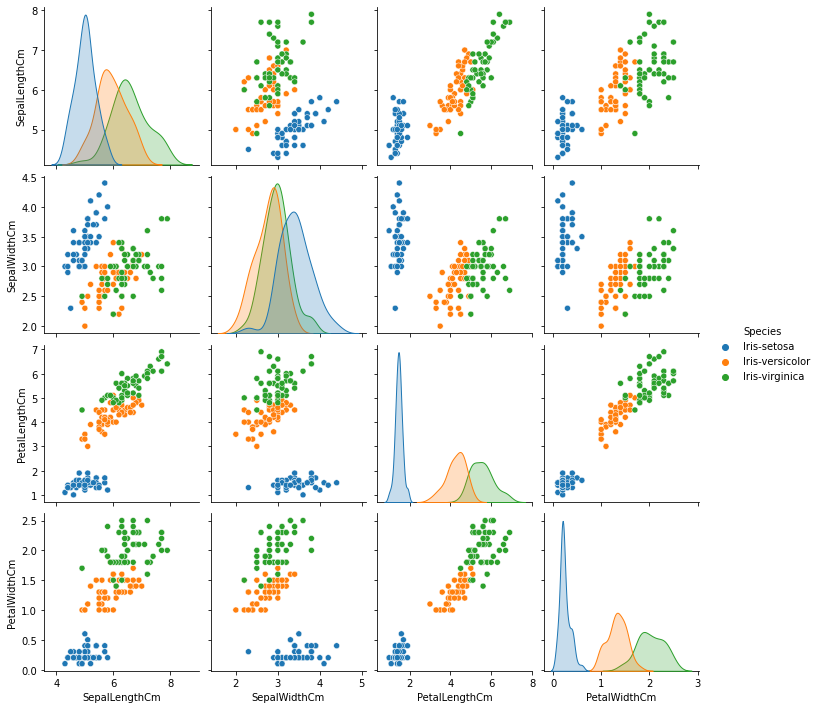

In [ ]:
sns.pairplot(data, hue='Species')
plt.show()

##3D Visualization

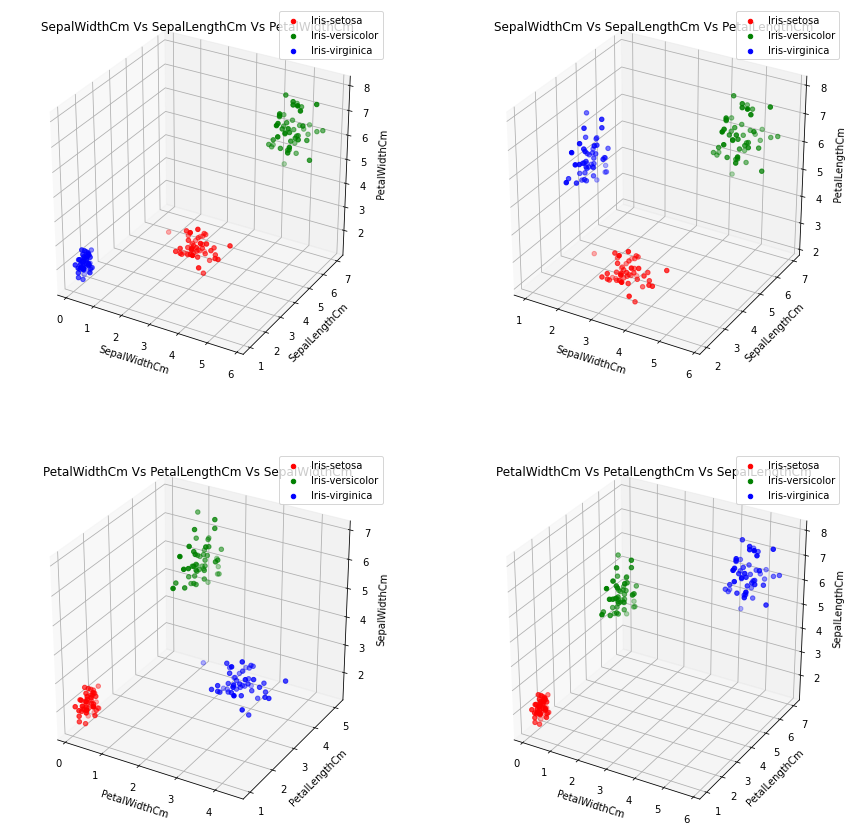

In [ ]:
def create_3DScatter(feature1, feature2, feature3):
  dx = data.loc[data['Species']=='Iris-setosa', feature1], 
  dy = data.loc[data['Species']=='Iris-versicolor', feature1]
  dz = data.loc[data['Species']=='Iris-virginica', feature1]
  ax.scatter3D(dx, dy, dz, color='r', label='Iris-setosa')
  dx = data.loc[data['Species']=='Iris-setosa', feature2], 
  dy = data.loc[data['Species']=='Iris-versicolor', feature2]
  dz = data.loc[data['Species']=='Iris-virginica', feature2]
  ax.scatter3D(dx, dy, dz, color='g', label='Iris-versicolor')
  dx = data.loc[data['Species']=='Iris-setosa', feature3], 
  dy = data.loc[data['Species']=='Iris-versicolor', feature3]
  dz = data.loc[data['Species']=='Iris-virginica', feature3]
  ax.scatter3D(dx, dy, dz, color='b', label='Iris-virginica')
  plt.title(feature1 + ' Vs ' + feature2 + ' Vs ' + feature3)
  ax.legend()
  ax.set_xlabel(feature1)
  ax.set_ylabel(feature2)
  ax.set_zlabel(feature3)

fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(2, 2, 1, projection='3d')
create_3DScatter('SepalWidthCm', 'SepalLengthCm', 'PetalWidthCm')
ax = fig.add_subplot(2, 2, 2, projection='3d')
create_3DScatter('SepalWidthCm', 'SepalLengthCm', 'PetalLengthCm')
ax = fig.add_subplot(2, 2, 3, projection='3d')
create_3DScatter('PetalWidthCm', 'PetalLengthCm', 'SepalWidthCm')
ax = fig.add_subplot(2, 2, 4, projection='3d')
create_3DScatter('PetalWidthCm', 'PetalLengthCm', 'SepalLengthCm')
plt.show()

## Checking Correlation

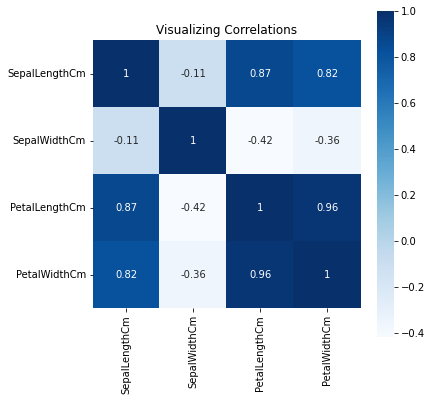

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(), cmap='Blues', square=True, annot=True)
plt.title('Visualizing Correlations')
plt.show()

#Data Preprocessing

In [ ]:
X = data.drop('Species', axis=1)
y = data['Species']
print(X.head())
print(y.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


##Data Scaling

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

##Encoding the Categories for the Label

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

##Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 0)

##Results Generation Function

In [ ]:
def generate_results(model, pred, name):
  cl_rep = classification_report(y_test, pred)
  print('\nThe Classification Report for ' + name + ' is:', cl_rep, sep = '\n')
  cm_model = confusion_matrix(y_test, pred)
  plt.figure(figsize=(6,6))
  sns.heatmap(cm_model, annot = True, cmap = 'Blues', square = True)
  plt.title('Confusion Matrix for ' + name)
  plt.show()

##Logistic regression

The accuracy for Logistic regression is: 100.0 %

The Classification Report for Logistic_Regression is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



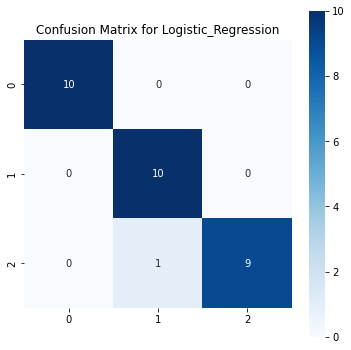

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_lr = lr.score(X_test, y_pred)
print('The accuracy for Logistic regression is:', acc_lr*100, '%')
generate_results(lr, y_pred, 'Logistic_Regression')

##KNN

The accuracy for KNN is: 96.66666666666667 %
The optimal value of n_neighbors is: {'n_neighbors': 5}

The Classification Report for KNN is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



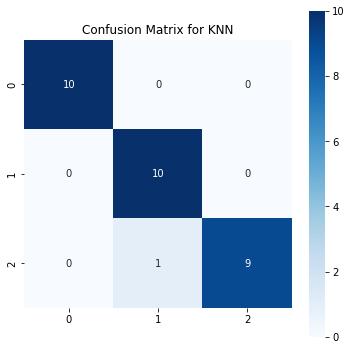

In [ ]:
knn = KNeighborsClassifier()
k_range = list(range(1,10))
param_grid = ({'n_neighbors':k_range})
grid_cv_knn = GridSearchCV(knn, param_grid, cv = 10)
grid_cv_knn.fit(X_train, y_train)
y_pred = grid_cv_knn.predict(X_test)
acc_knn = grid_cv_knn.score(X_test, y_test)
print('The accuracy for KNN is:', acc_knn*100, '%')
print('The optimal value of n_neighbors is:', grid_cv_knn.best_params_)
generate_results(grid_cv_knn, y_pred, 'KNN')

##Radius Neighbor Classifier

The accuracy for Radius Naighbor Classifier is: 100.0 %

The Classification Report for Radius Naighbor Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



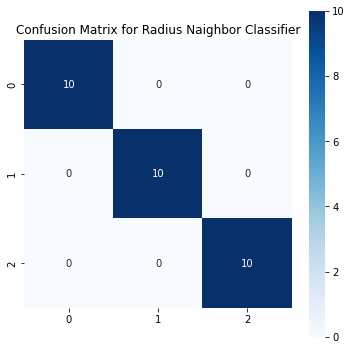

In [ ]:
rnc = RadiusNeighborsClassifier()
rnc.fit(X_train, y_train)
y_pred = rnc.predict(X_test)
acc_rnc = rnc.score(X_test, y_test)
print('The accuracy for Radius Naighbor Classifier is:', acc_rnc*100, '%')
generate_results(rnc, y_pred, 'Radius Naighbor Classifier')

##Gaussian Naive Baise

The accuracy for Gaussian Naive Baise is: 96.66666666666667 %

The Classification Report for Gaussian Naive Baise is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



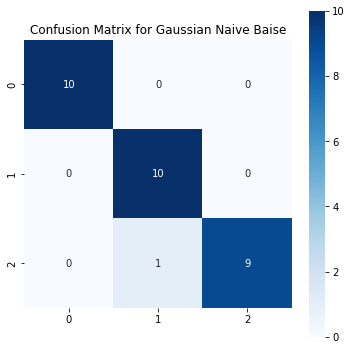

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc_gnb = gnb.score(X_test, y_test)
print('The accuracy for Gaussian Naive Baise is:', acc_gnb*100, '%')
generate_results(rnc, y_pred, 'Gaussian Naive Baise')

##Support Vector Classifier

The accuracy for Support Vector Classifier is: 100.0 %

The Classification Report for Support Vector Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



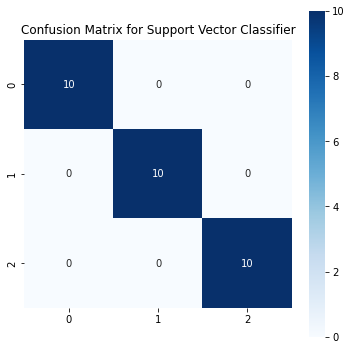

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = svc.score(X_test, y_test)
print('The accuracy for Support Vector Classifier is:', acc_svc*100, '%')
generate_results(rnc, y_pred, 'Support Vector Classifier')

##Quadratic Discriminant Analysis

The accuracy for Support Vector Classifier is: 100.0 %

The Classification Report for Support Vector Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



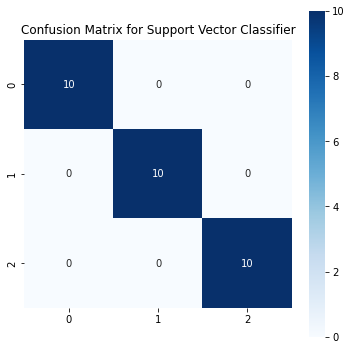

In [ ]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
acc_qda = qda.score(X_test, y_test)
print('The accuracy for Support Vector Classifier is:', acc_qda*100, '%')
generate_results(qda, y_pred, 'Support Vector Classifier')

##Decision Tree Classifier

The accuracy for Decision tree Classifier is: 96.66666666666667 %

The Classification Report for Decision Tree Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



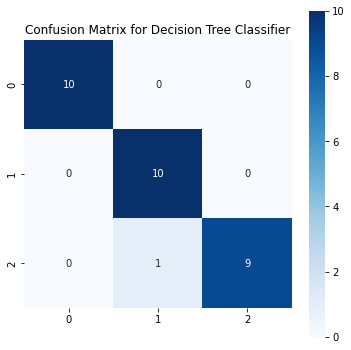

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
acc_dtc = dtc.score(X_test, y_test)
print('The accuracy for Decision tree Classifier is:', acc_dtc*100, '%')
generate_results(dtc, y_pred, 'Decision Tree Classifier')

##Random Forest Classifieer

The accuracy for Random Forest Classifier is: 96.66666666666667 %

The Classification Report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



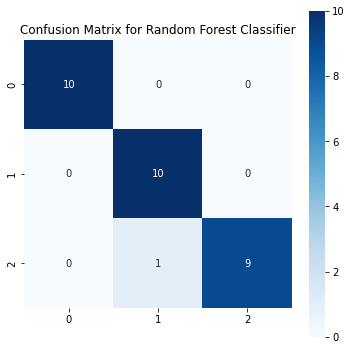

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
acc_rfc = rfc.score(X_test, y_test)
print('The accuracy for Random Forest Classifier is:', acc_rfc*100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')

##Ada Boost Classifier

The accuracy for Ada Boost Classifier is: 93.33333333333333 %

The Classification Report for Ada Boost Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



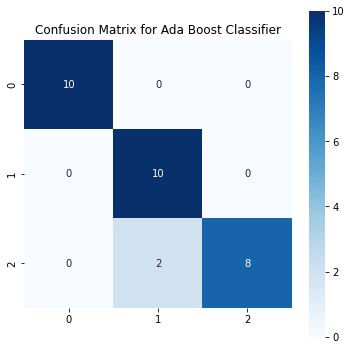

In [ ]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
acc_abc = abc.score(X_test, y_test)
print('The accuracy for Ada Boost Classifier is:', acc_abc*100, '%')
generate_results(abc, y_pred, 'Ada Boost Classifier')

##Extra Trees Classifier

The accuracy for Extra Trees Classifier is: 100.0 %

The Classification Report for Extra Trees Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



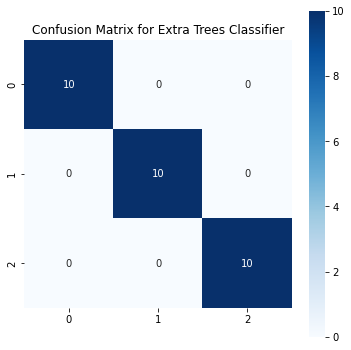

In [ ]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
acc_etc = etc.score(X_test, y_test)
print('The accuracy for Extra Trees Classifier is:', acc_etc*100, '%')
generate_results(etc, y_pred, 'Extra Trees Classifier')

##Bagging Classifier

The accuracy for Bagging Classifier is: 93.33333333333333 %

The Classification Report for Bagging Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



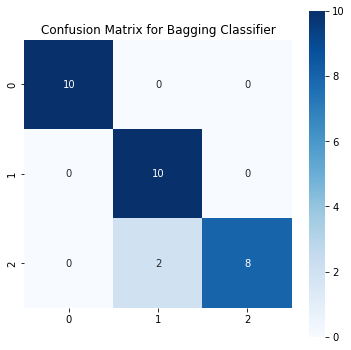

In [ ]:
bc = BaggingClassifier()
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
acc_bc = bc.score(X_test, y_test)
print('The accuracy for Bagging Classifier is:', acc_bc*100, '%')
generate_results(bc, y_pred, 'Bagging Classifier')

##Gradient Boosting Classifier

The accuracy for Gradient Boosting Classifier is: 96.66666666666667 %

The Classification Report for Gradient Boosting Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



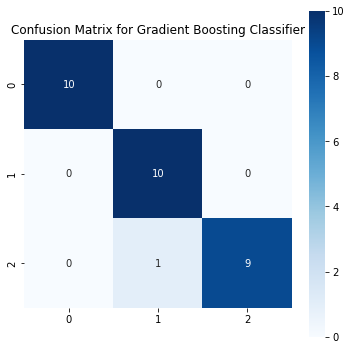

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
acc_gbc = gbc.score(X_test, y_test)
print('The accuracy for Gradient Boosting Classifier is:', acc_gbc*100, '%')
generate_results(gbc, y_pred, 'Gradient Boosting Classifier')

##XG Boost Classifier

The accuracy for XG Boost Classifier is: 93.33333333333333 %

The Classification Report for XG Boost Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



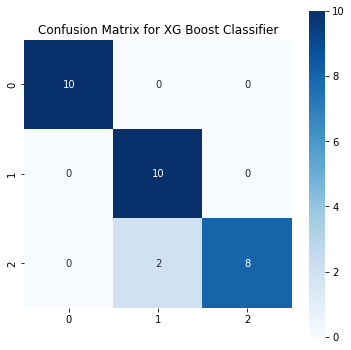

In [ ]:
xgbc = XGBClassifier(n_jobs = -1, silent = True, verbosity = 0)
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
acc_xgbc = xgbc.score(X_test, y_test)
print('The accuracy for XG Boost Classifier is:', acc_xgbc*100, '%')
generate_results(xgbc, y_pred, 'XG Boost Classifier')

# Create Results Bar

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


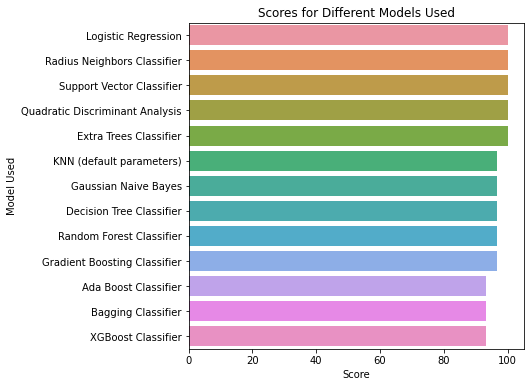

In [ ]:
data = {'Logistic Regression': acc_lr * 100, 
        'KNN (default parameters)': acc_knn * 100,  
        'Radius Neighbors Classifier': acc_rnc * 100, 
        'Gaussian Naive Bayes': acc_gnb * 100,
        'Support Vector Classifier': acc_svc * 100, 
        'Quadratic Discriminant Analysis': acc_qda * 100, 
        'Decision Tree Classifier': acc_dtc * 100, 
        'Random Forest Classifier': acc_rfc * 100,
        'Ada Boost Classifier': acc_abc * 100, 
        'Extra Trees Classifier': acc_etc * 100,
        'Bagging Classifier': acc_bc * 100, 
        'Gradient Boosting Classifier': acc_gbc * 100,
        'XGBoost Classifier': acc_xgbc * 100}

sort_data = dict(sorted(data.items(), key=lambda x: x[1], reverse=True))      
model = list(sort_data.keys())
score = list(sort_data.values())
fig = plt.figure(figsize=(6,6))
sns.barplot(score, model)
plt.title('Scores for Different Models Used')
plt.xlabel('Score')
plt.ylabel('Model Used')
plt.show()


